In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
test = pd.read_csv('test.csv')
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [4]:
all_data = test.append(train)
all_data.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276


# Feature Engineering
refer to [Titanic best working Classifier](https://www.kaggle.com/sinakhorami/titanic-best-working-classifier)

## Sex

In [5]:
all_data['Sex'].isnull().values.any()

False

In [6]:
train[['Survived', 'Sex']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


## Pclass

In [7]:
all_data['Pclass'].isnull().values.any()

False

In [8]:
train[['Survived', 'Pclass']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


## Age

In [9]:
all_data['Age'].isnull().values.any()

True

**TODO: There are nulls in Age, should fill values**

In [10]:
train['AgeSegment'] = pd.cut(train['Age'], 10)
train[['Survived', 'AgeSegment']].groupby(['AgeSegment']).mean()

,Survived
AgeSegment,
"(0.34, 8.378]",0.666667
"(8.378, 16.336]",0.413043
"(16.336, 24.294]",0.355932
"(24.294, 32.252]",0.384615
"(32.252, 40.21]",0.440678
"(40.21, 48.168]",0.342857
"(48.168, 56.126]",0.466667
"(56.126, 64.084]",0.375000
"(64.084, 72.042]",0.000000


# Family Size

In [11]:
all_data['Parch'].isnull().values.any()

False

In [12]:
all_data['SibSp'].isnull().values.any()

False

In [13]:
train['FamilySize'] = train['Parch'] + train['SibSp']
train['FamilySize'].head(3)

0    1
1    1
2    0
Name: FamilySize, dtype: int64

In [14]:
train[['Survived', 'FamilySize']].groupby(['FamilySize']).mean()

,Survived
FamilySize,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


## Fare

In [15]:
all_data['Fare'].isnull().values.any()

True

In [16]:
train['FareSegment'] = pd.cut(train['Fare'], 10)
train[['Survived', 'FareSegment']].groupby(['FareSegment']).mean()

,Survived
FareSegment,
"(-0.512, 51.233]",0.318306
"(51.233, 102.466]",0.660377
"(102.466, 153.699]",0.741935
"(153.699, 204.932]",1.000000
"(204.932, 256.165]",0.636364
"(256.165, 307.398]",0.666667
"(307.398, 358.63]",NaN
"(358.63, 409.863]",NaN
"(409.863, 461.096]",NaN


**TODO: Fare has null, should fill it**

## Embarked

In [17]:
all_data['Embarked'].isnull().values.any()

True

In [18]:
train[['Embarked', 'PassengerId']].groupby(['Embarked']).count()

,PassengerId
Embarked,
C,168
Q,77
S,644


**TODO: Fill null with most occurred value**

In [19]:
train[['Survived', 'Embarked']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


# Data clean

## Sex

In [20]:
def map_sex(data):
    data['Sex'] = data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
map_sex(train)
map_sex(test)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeSegment,FamilySize,FareSegment
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.336, 24.294]",1,"(-0.512, 51.233]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,"(32.252, 40.21]",1,"(51.233, 102.466]"
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(24.294, 32.252]",0,"(-0.512, 51.233]"


## Age

In [21]:
def fill_null_age(data):
    age_avg = all_data['Age'].mean()
    age_std = all_data['Age'].std()
    age_null_cnt = data['Age'].isnull().sum()
    age_null_fill = np.random.randint(age_avg - age_std, age_avg + age_std, age_null_cnt)
    data['Age'][data['Age'].isnull()] = age_null_fill

fill_null_age(train)
fill_null_age(test)

/ai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
train['Age'].isnull().sum()

0

In [23]:
_, bins = pd.cut(all_data['Age'], 10, labels=False, retbins=True)
def map_age(data):
    data['Age'] = pd.cut(data['Age'], bins, labels=False)

map_age(train)
map_age(test)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeSegment,FamilySize,FareSegment
0,1,0,3,"Braund, Mr. Owen Harris",1,2,1,0,A/5 21171,7.2500,NaN,S,"(16.336, 24.294]",1,"(-0.512, 51.233]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,4,1,0,PC 17599,71.2833,C85,C,"(32.252, 40.21]",1,"(51.233, 102.466]"
2,3,1,3,"Heikkinen, Miss. Laina",0,3,0,0,STON/O2. 3101282,7.9250,NaN,S,"(24.294, 32.252]",0,"(-0.512, 51.233]"


# Fare

In [24]:
# use avg to fill null, because only test has one value with null
def fill_null_fare(data):
    data['Fare'][data['Fare'].isnull()] = data['Fare'].mean()
    
fill_null_fare(train)
fill_null_fare(test)

/ai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
_, bins = pd.cut(all_data['Fare'], 10, labels=False, retbins=True)
def map_fare(data):
    data['Fare'] = pd.cut(data['Fare'], bins, labels = False)

map_fare(train)
map_fare(test)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeSegment,FamilySize,FareSegment
0,1,0,3,"Braund, Mr. Owen Harris",1,2,1,0,A/5 21171,0,NaN,S,"(16.336, 24.294]",1,"(-0.512, 51.233]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,4,1,0,PC 17599,1,C85,C,"(32.252, 40.21]",1,"(51.233, 102.466]"
2,3,1,3,"Heikkinen, Miss. Laina",0,3,0,0,STON/O2. 3101282,0,NaN,S,"(24.294, 32.252]",0,"(-0.512, 51.233]"


## Embarked

In [26]:
# fill null with most occurred value 'S'
def fill_null_embarked(data):
    data['Embarked'][data['Embarked'].isnull()] = 'S'
    
fill_null_embarked(train)
fill_null_embarked(test)

/ai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
def map_embarked(data):
    data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

map_embarked(train)
map_embarked(test)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeSegment,FamilySize,FareSegment
0,1,0,3,"Braund, Mr. Owen Harris",1,2,1,0,A/5 21171,0,NaN,0,"(16.336, 24.294]",1,"(-0.512, 51.233]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,4,1,0,PC 17599,1,C85,1,"(32.252, 40.21]",1,"(51.233, 102.466]"
2,3,1,3,"Heikkinen, Miss. Laina",0,3,0,0,STON/O2. 3101282,0,NaN,0,"(24.294, 32.252]",0,"(-0.512, 51.233]"


## Family Size

In [28]:
def add_family_size(data):
    data['FamilySize'] = data['Parch'] + data['SibSp']

add_family_size(train)
add_family_size(test)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeSegment,FamilySize,FareSegment
0,1,0,3,"Braund, Mr. Owen Harris",1,2,1,0,A/5 21171,0,NaN,0,"(16.336, 24.294]",1,"(-0.512, 51.233]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,4,1,0,PC 17599,1,C85,1,"(32.252, 40.21]",1,"(51.233, 102.466]"
2,3,1,3,"Heikkinen, Miss. Laina",0,3,0,0,STON/O2. 3101282,0,NaN,0,"(24.294, 32.252]",0,"(-0.512, 51.233]"


## clean other column

In [29]:
def clean(data):
    return data.drop(['Name', 'Ticket', 'Cabin', 'AgeSegment', 'SibSp', 'Parch', 'FareSegment'], axis=1, errors='ignore')

train = clean(train)
test = clean(test)
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,1,2,0,0,1
1,2,1,1,0,4,1,1,1
2,3,1,3,0,3,0,0,0


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [31]:
X_train = train.drop('Survived', axis=1)
y_train = train[['Survived']]

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

model = DecisionTreeClassifier()
for train_index, test_index in split.split(X_train, y_train):
    model.fit(X_train.loc[train_index], y_train.loc[train_index])
    y = model.predict(X_train.loc[test_index])
    print(accuracy_score(y_train.loc[test_index], y))

0.722222222222
0.722222222222
0.711111111111
0.777777777778
0.655555555556
0.788888888889
0.777777777778
0.722222222222
0.766666666667
0.777777777778


In [33]:
X_test = test
X_test.head(3)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,892,3,1,4,0,2,0
1,893,3,0,5,0,0,1
2,894,2,1,7,0,2,0


In [34]:
Y_test = model.predict(X_test)

In [35]:
submission = pd.DataFrame({
        "PassengerId": X_test["PassengerId"],
        "Survived": Y_test
    })
submission.to_csv('./submission.csv', index=False)

# Pearson Correlation Heatmap

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

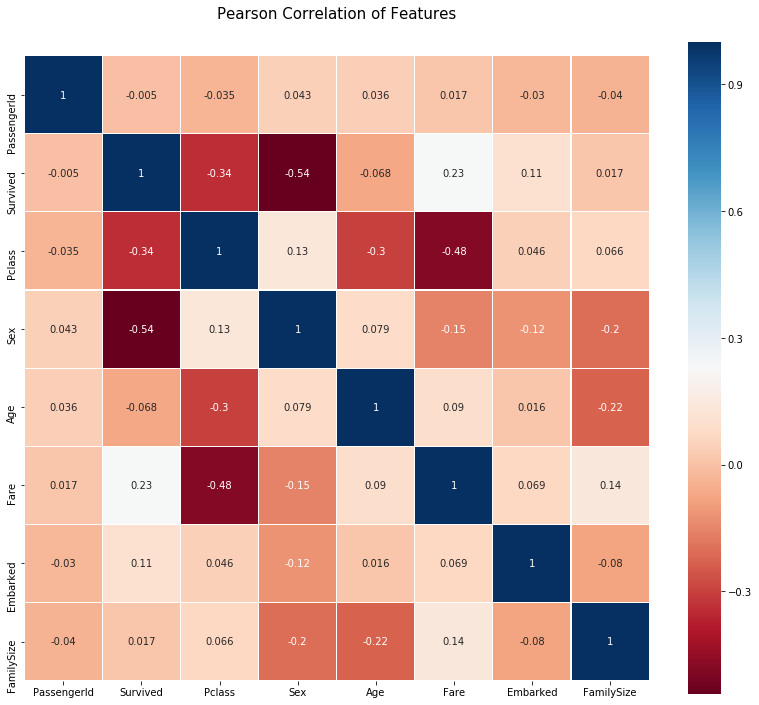

In [37]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Pair Plot

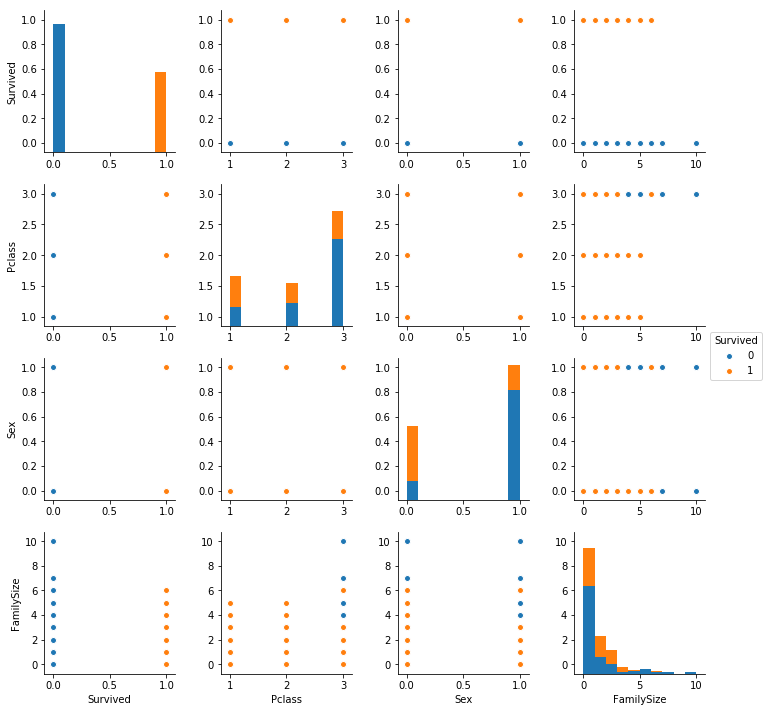

In [38]:
sns.pairplot(train[['Survived', 'Pclass', 'Sex', 'FamilySize']], hue='Survived', diag_kind = 'hist')

plot上的点, 只要存在Survived=1的数据, 即标记为1, 否则标记为0. (并不反应Survived的多少)

# Violin Plot

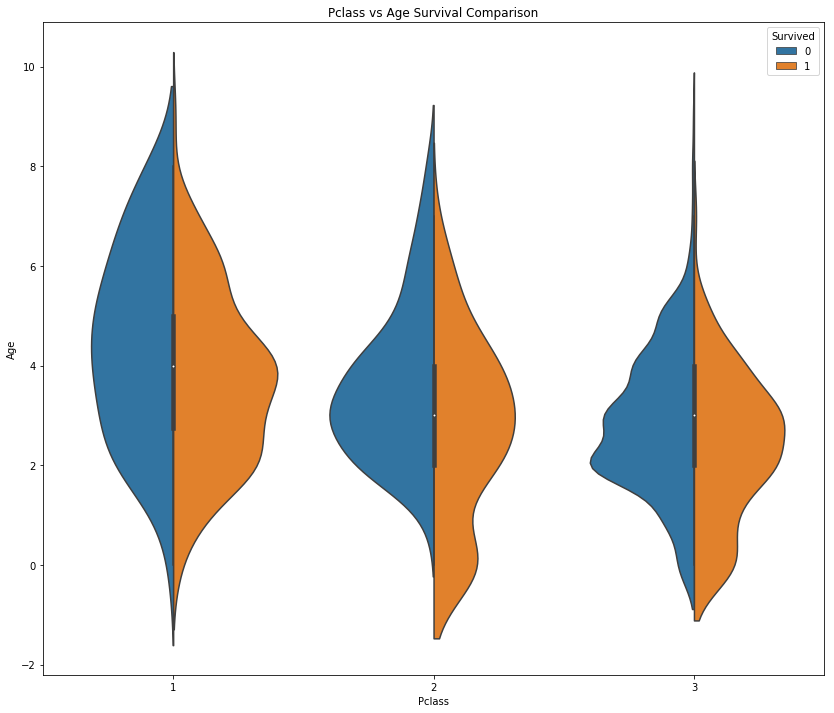

In [39]:
plt.figure(figsize=(14,12))
plt.title('Pclass vs Age Survival Comparison')
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train, split = True)